In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
%matplotlib inline

**Read the dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/amirebmi/kickstarter/master/ks-projects-201801.csv')

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

**Let's subtract deadline by launched time of project to calculate the duration of each project**
---


*   We'll add **duration** to the dataframe after the calculation is done!









In [ ]:
df.launched = pd.to_datetime(df.launched)
df.deadline = pd.to_datetime(df.deadline)
df['duration'] = (df.deadline - df.launched).astype('timedelta64[h]')

**Dropping useless columns, such as ID**

In [ ]:
df = df.drop(columns=['ID'])
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,1403.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,1435.0
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,1079.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,716.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,1335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,717.0
378657,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,644.0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,1084.0
378659,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,725.0


**Find columns that have null values**

In [ ]:
df.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
duration               0
dtype: int64

**Finding rows where they Do Not have project name**

In [ ]:
df[df['name'].isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
166851,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00,1403.0
307234,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97,408.0
309991,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00,714.0
338931,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00,672.0


**Analyzing Columns with *No Name*:**

1. 3 U.S. projects and 1 UK Project
2. Projects with No Name most likely be failed or suspended. 


**Find rows where they Do Not have USD Pledge**

In [ ]:
df[df['usd pledged'].isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
169,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00,1058.0
328,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53,491.0
632,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00,699.0
647,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00,553.0
749,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00,644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00,1435.0
378303,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04,1079.0
378434,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00,698.0
378585,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2000.0,2015-09-21 22:33:18,2125.00,undefined,0,"N,0""",NaN,3273.36,3080.81,649.0


**Analyzing Columns with *Non USD Pledge*:**


Rows with no value for **usd pledged** are not usable because we can not determine the state of the project without knowing how much money are being pledged.

**Dropping rows from the dataframe where they are *NULL***

In [ ]:
df = df.dropna()
df.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
duration            0
dtype: int64

**Counting the number of projects for each county**

In [ ]:
df.country.value_counts()

US    292624
GB     33671
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

In [ ]:
(df['country'].values == 'US').sum()

292624

### **How many of the Kickstarter projects are from the U.S.?**

In [ ]:
us_per = (df['country'].values == 'US').sum() / df.country.value_counts().sum()
print("US's kickstarter constitutes about " + str("%0.2f" % (us_per * 100)) + "% of all kickstarter project")

US's kickstarter constitutes about 78.06% of all kickstarter project


**Function to display percentage on plot**

In [ ]:
def percent_plot(data, title):
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();

**Display each country and number of its project on Kickstarter**

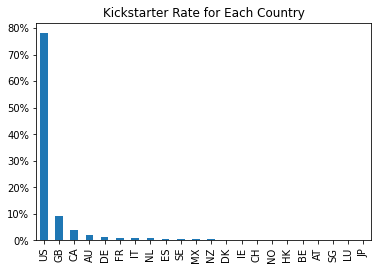

In [ ]:
percent_plot((df.country.value_counts()/df.country.value_counts().sum()*100), "Kickstarter Rate for Each Country")

Result: The U.S. has the most project compared to other countries. Therefore, we will work on US based kickstarter projects


---

**Extracting data where projects are based in the U.S. :**



In [ ]:
df = df.loc[df['country'] == 'US']

df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.0,1435.0
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.0,1079.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.0,716.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.0,1335.0
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.0,826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0,717.0
378657,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0,644.0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0,1084.0
378659,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0,725.0


**Removing Unnecessary Columns**

**USD Pledge:** Since this feature ONLY indicates the amount of money that has been funded in the USD and we are only working on U.S. projects, we don't need this features as we already have the same amount in **Pledge**

**usd_pledged_real:** We don't need this feature because we we already know we are only working on project in the U.S.

**usd_goal_real:** It's always equal to goal since we are ONLY working on project based in the U.S.



In [ ]:
df = df.drop(columns=['usd pledged', 'usd_pledged_real', 'usd_goal_real'])
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,duration
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,1435.0
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,1079.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,716.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1335.0
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,826.0
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,717.0
378657,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,644.0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,1084.0
378659,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,725.0


We also don't need the currency and country column anymore now that we are just working with US.

In [ ]:
df = df.drop(columns=['currency', 'country'])
df

,name,category,main_category,deadline,goal,launched,pledged,state,backers,duration
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,1435.0
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,1079.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,716.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,1335.0
5,Monarch Espresso Bar,Restaurants,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,826.0
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,717.0
378657,The Tribe,Narrative Film,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,644.0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,1084.0
378659,BioDefense Education Kit,Technology,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,725.0


**We will look into the projects categories and count how many projects are allocated to each category:**

In [ ]:
df.main_category.value_counts()

Film & Video    51921
Music           43238
Publishing      31726
Games           24636
Art             22310
Design          21689
Technology      21556
Food            19941
Fashion         16584
Comics           8910
Theater          8709
Photography      7988
Crafts           6648
Journalism       3540
Dance            3228
Name: main_category, dtype: int64

It looks like projects in **Film & Video** AND **Music** have the majority of the number of the projects. 

Let's plot plot it to be more clear:

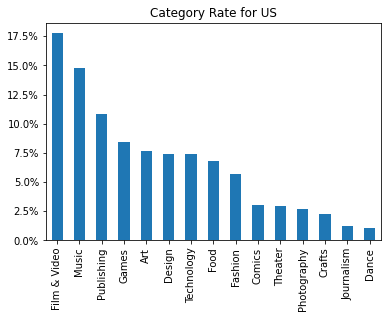

In [ ]:
percent_plot((df.main_category.value_counts()/df.main_category.value_counts().sum()*100), "Category Rate for US")

**Figuring out the result of projects in the U.S.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


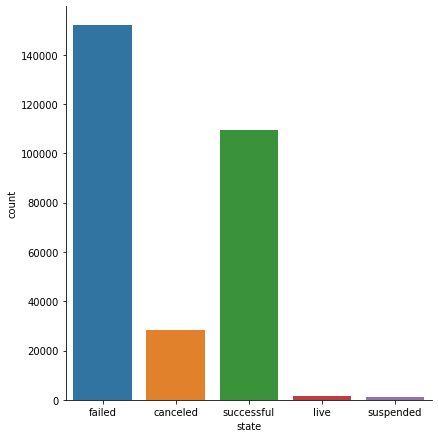

In [ ]:
sns.catplot('state',data=df,kind='count', height=6)

Looks like the number of project that **failed** are larger than other categories, such as *Failed*, *Canceled*, *Successful*, *Live*, and *Suspended*.

For the sake of simplicity, we need to remove **live** and **suspended**

In [ ]:
df = df.loc[(df['state'] != 'live') & (df['state'] != 'suspended')]
df

,name,category,main_category,deadline,goal,launched,pledged,state,backers,duration
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,1435.0
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,1079.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,716.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,1335.0
5,Monarch Espresso Bar,Restaurants,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,826.0
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,717.0
378657,The Tribe,Narrative Film,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,644.0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,1084.0
378659,BioDefense Education Kit,Technology,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,725.0


##**Machine Learning**

# **1) Random Forest**


Specifying the features:

In [ ]:
X = df.drop(columns=['name', 'category','state', 'deadline', 'launched'])
X

,main_category,goal,pledged,backers,duration
1,Film & Video,30000.0,2421.0,15,1435.0
2,Film & Video,45000.0,220.0,3,1079.0
3,Music,5000.0,1.0,1,716.0
4,Film & Video,19500.0,1283.0,14,1335.0
5,Food,50000.0,52375.0,224,826.0
...,...,...,...,...,...
378656,Film & Video,50000.0,25.0,1,717.0
378657,Film & Video,1500.0,155.0,5,644.0
378658,Film & Video,15000.0,20.0,1,1084.0
378659,Technology,15000.0,200.0,6,725.0


Specifiyng the lable:

In [ ]:
y = df['state']
y

1             failed
2             failed
3             failed
4           canceled
5         successful
             ...    
378656      canceled
378657        failed
378658        failed
378659        failed
378660        failed
Name: state, Length: 289669, dtype: object

**main_category** has *15* different categories. To classify each category we need to use *One-Hot Encoding*. 

*Each category becomes a column that 0 OR 1 determines whether the project is associated with that particular project or not*

In [ ]:
X = pd.get_dummies(X, columns=['main_category'])
X

,goal,pledged,backers,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
1,30000.0,2421.0,15,1435.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,45000.0,220.0,3,1079.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,5000.0,1.0,1,716.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,19500.0,1283.0,14,1335.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,50000.0,52375.0,224,826.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,50000.0,25.0,1,717.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
378657,1500.0,155.0,5,644.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
378658,15000.0,20.0,1,1084.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
378659,15000.0,200.0,6,725.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Splitting the data into training set and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Training the data and making prediction on testing features using **Random Forest**:

In [ ]:
my_RandomForest = RandomForestClassifier(n_estimators = 28, bootstrap = True, random_state=5)
my_RandomForest.fit(X_train, y_train)
y_predict_RF = my_RandomForest.predict(X_test)
print(accuracy_score(y_test, y_predict_RF))

0.8854558635688887


### **Random Forest** *Accuracy* Prediction using **data splitting**: **88.54%** 

## **Confusion Matrix (Random Forest)**

In [ ]:
cm_RF = metrics.confusion_matrix(y_predict_RF, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_RF)

Confusion matrix of Random Forest:
[[29053    14  4998]
 [  158 21822   137]
 [ 1321     8   423]]


In [ ]:
counts = y_test.value_counts()
counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

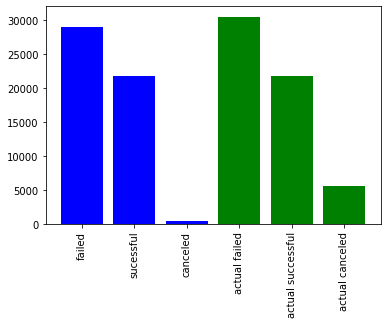

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_RF[0][0], cm_RF[1][1], cm_RF[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])



## **Cross Validation for Random Forest**

In [ ]:
RF_accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
RF_Accuracy = RF_accuracy_list.mean()
print(RF_Accuracy)

0.8846787201471127


### **Random Forest** *Accuracy* Prediction using **Cross Validation**: **88.46%** 

# **2) KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Specifiyng the k nearest neighbor
k = 3

knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_predict_KNN = knn.predict(X_test) 
print(y_predict_KNN)

['failed' 'successful' 'failed' ... 'failed' 'successful' 'successful']


### **Comparing Actual labels of testing set to Predicted labels for evaluaction**

In [ ]:
# Compare actual labels of testing set to predicted label
accuracy = accuracy_score(y_test, y_predict_KNN)
print(accuracy)

0.8767390478820727


### **KNN** *Accuracy* Prediction using **data splitting**: **87.67%** 

Display where KNN predicted incorrectly

In [ ]:
# Check the mistakes
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict_KNN

print(results)

            actual  prediction
212266      failed      failed
274571  successful  successful
320128      failed      failed
34014   successful  successful
51176       failed      failed
...            ...         ...
172718      failed    canceled
43707   successful  successful
28947       failed      failed
44258   successful  successful
135231  successful  successful

[57934 rows x 2 columns]


## **Confusion Matrix (KNN)**

In [ ]:
cm_KNN = metrics.confusion_matrix(y_predict_KNN, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_KNN)

Confusion matrix of Random Forest:
[[28465     4  4964]
 [   28 21831    97]
 [ 2039     9   497]]


In [ ]:
counts = y_test.value_counts()

counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

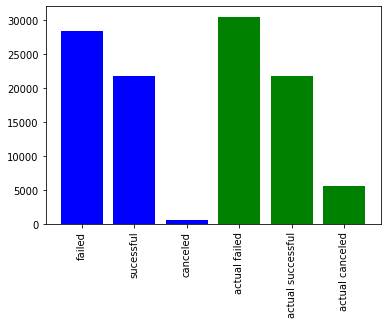

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_KNN[0][0], cm_KNN[1][1], cm_KNN[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])


## **Cross Validation for KNN**

In [ ]:
KNN_accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [ ]:
KNN_Accuracy = KNN_accuracy_list.mean()
print(KNN_Accuracy)

0.8746224041676103


### **KNN** *Accuracy* Prediction using **Cross Validation**: **87.46%** 

# **3) Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
my_decisiontree = DecisionTreeClassifier()

In [ ]:
my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict_DT = my_decisiontree.predict(X_test)

print(y_predict_DT)

['canceled' 'successful' 'canceled' ... 'failed' 'successful' 'successful']


In [ ]:
accuracy = accuracy_score(y_test, y_predict_DT)

print(accuracy)

0.83810888252149


### **Decision Tree Classifier** *Accuracy* Prediction using **data splitting**: **83.68%** 

## **Cross Validation for Decision Tree Classifier**

In [ ]:
DT_accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')

DT_Accuracy = DT_accuracy_list.mean()

print(DT_Accuracy)

0.8354604786246261


### **Decision Tree Classifier** *Accuracy* Prediction using **Cross Validation**: **83.57%** 

## **Confusion Matrix (Decision Tree)**

In [ ]:
cm_DT = metrics.confusion_matrix(y_predict_DT, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_DT)

Confusion matrix of Random Forest:
[[25658    16  4269]
 [   32 21699    91]
 [ 4842   129  1198]]


In [ ]:
counts = y_test.value_counts()

counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

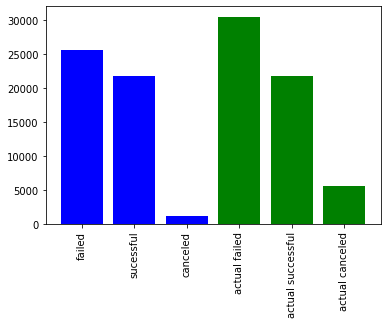

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_DT[0][0], cm_DT[1][1], cm_DT[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])


# **4) Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
my_logistic_regression = LogisticRegression()

# training stage of the logistic regression
my_logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict_LR = my_logistic_regression.predict(X_test)

In [ ]:
LR_accuracy = accuracy_score(y_test, y_predict_LR)

#Logistic Regression acuuracy
print(LR_accuracy)

0.8938619808747885


### **Logistic Regression** *Accuracy* Prediction using **data splitting**: **89.38%** 

## **Confusion Matrix (Logistic Regression)**

In [ ]:
cm_LR = metrics.confusion_matrix(y_predict_LR, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_LR)

Confusion matrix of Random Forest:
[[29941     1  5350]
 [  581 21843   207]
 [   10     0     1]]


In [ ]:
counts = y_test.value_counts()

counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

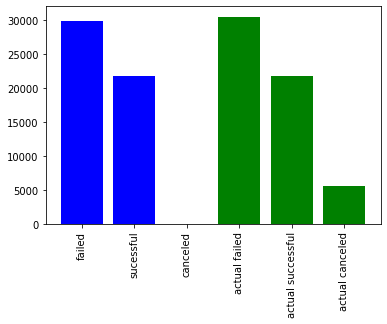

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_LR[0][0], cm_LR[1][1], cm_LR[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])

## **Cross Validation for Logistic Regression**

In [ ]:
LR_accuracy_list = cross_val_score(my_logistic_regression, X, y, cv=10, scoring='accuracy')

In [ ]:
LR_accuracy = LR_accuracy_list.mean()

print(LR_accuracy)

0.8940273219833037


### **Logistic Regression** *Accuracy* Prediction using **Cross Validation**: **89.40%** 

#**5) AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

my_AdaBoost.fit(X_train, y_train)
y_predict_ada = my_AdaBoost.predict(X_test)
score = accuracy_score(y_test, y_predict_ada)
print("Accuracy Score: " + str(score))

Accuracy Score: 0.8712155211102289


## **Confusion Matrix (AdaBoost)**

In [ ]:
cm_ada = metrics.confusion_matrix(y_predict_ada, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_ada)

Confusion matrix of Random Forest:
[[29430   790  5325]
 [ 1088 21037   227]
 [   14    17     6]]


In [ ]:
counts = y_test.value_counts()

counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

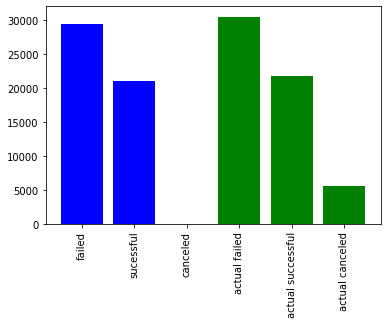

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_ada[0][0], cm_ada[1][1], cm_ada[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])

# **6) XGBoost**

In [ ]:
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2, use_label_encoder=False, verbosity = 0)

my_XGBoost.fit(X_train, y_train)
y_predict_xgb = my_XGBoost.predict(X_test)
score = accuracy_score(y_test, y_predict_xgb)
print("Accuracy Score: " + str(score))

Accuracy Score: 0.8719232229778714


## **Confusion Matrix (XGBoost)**

In [ ]:
cm_xgb = metrics.confusion_matrix(y_predict_xgb, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_xgb)

Confusion matrix of Random Forest:
[[28926   256  5161]
 [ 1606 21588   397]
 [    0     0     0]]


In [ ]:
counts = y_test.value_counts()

counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

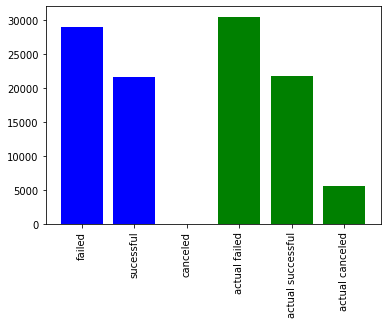

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_xgb[0][0], cm_xgb[1][1], cm_xgb[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])

# **7)ANN using SKLearn**

In [ ]:
my_ANN = MLPClassifier(hidden_layer_sizes=(8,6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=2, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)
my_ANN.fit(X_train, y_train)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.38149182
Iteration 2, loss = 0.35056610
Iteration 3, loss = 0.36111505
Iteration 4, loss = 0.30521953
Iteration 5, loss = 0.40821566
Iteration 6, loss = 0.44166969
Iteration 7, loss = 0.43900058
Iteration 8, loss = 0.32127483
Iteration 9, loss = 0.30136475
Iteration 10, loss = 0.34468237
Iteration 11, loss = 0.38428914
Iteration 12, loss = 0.36579640
Iteration 13, loss = 0.35057727
Iteration 14, loss = 0.39795114
Iteration 15, loss = 0.54710838
Iteration 16, loss = 0.34074086
Iteration 17, loss = 0.31834439
Iteration 18, loss = 0.29993105
Iteration 19, loss = 0.28932464
Iteration 20, loss = 0.29221152
Iteration 21, loss = 0.35827187
Iteration 22, loss = 0.29234271
Iteration 23, loss = 0.33147043
Iteration 24, loss = 0.36071844
Iteration 25, loss = 0.36361109
Iteration 26, loss = 0.34744515
Iteration 27, loss = 0.40124701
Iteration 28, loss = 0.40786275
Iteration 29, loss = 0.33662238
Iteration 30, loss = 0.31603459
Training loss did not improve more than tol=0.000

## Confusion Matrix (ANN)

In [ ]:
cm_ANN = metrics.confusion_matrix(y_predict_ann, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_ANN)

Confusion matrix of Random Forest:
[[30183    22  5380]
 [  349 21822   178]
 [    0     0     0]]


In [ ]:
counts = y_test.value_counts()
counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

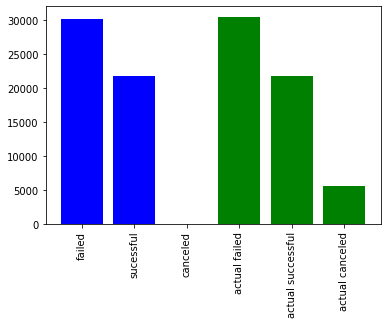

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_ANN[0][0], cm_ANN[1][1], cm_ANN[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])

## Cross Validation for ANN

In [ ]:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 0.42364700
Iteration 2, loss = 0.48370914
Iteration 3, loss = 0.37002535
Iteration 4, loss = 0.40678034
Iteration 5, loss = 0.37125904
Iteration 6, loss = 0.38507729
Iteration 7, loss = 0.33188086
Iteration 8, loss = 0.45483140
Iteration 9, loss = 0.40978161
Iteration 10, loss = 0.44516200
Iteration 11, loss = 0.31028153
Iteration 12, loss = 0.31752564
Iteration 13, loss = 0.31975271
Iteration 14, loss = 0.31055367
Iteration 15, loss = 0.33965982
Iteration 16, loss = 0.31547629
Iteration 17, loss = 0.44720779
Iteration 18, loss = 0.85402530
Iteration 19, loss = 0.93717018
Iteration 20, loss = 0.90382672
Iteration 21, loss = 0.48457564
Iteration 22, loss = 0.37239740
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48709093
Iteration 2, loss = 0.36835458
Iteration 3, loss = 0.34562490
Iteration 4, loss = 0.31585733
Iteration 5, loss = 0.32244943
Iteration 6, loss = 0.50210691
Iteration 7, loss = 0.4611323

In [ ]:
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)

0.8840917324437747


# 8)Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf = LinearSVC(C=1, random_state=2)
clf.fit(X_train,y_train)
y_predict_svm = clf.predict(X_test)
score_svm = accuracy_score(y_test, y_predict_svm)
print('\n','accuracy: ',score_svm)


 accuracy:  0.8627576207408431


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Confusion Matrix (SVM)

In [ ]:
cm_svm = metrics.confusion_matrix(y_predict_svm, y_test, labels=['failed','successful','canceled'])
print("Confusion matrix of Random Forest:")
print(cm_svm)

Confusion matrix of Random Forest:
[[29280    55  5230]
 [  304 20501   126]
 [  948  1288   202]]


In [ ]:
counts = y_test.value_counts()
counts

failed        30532
successful    21844
canceled       5558
Name: state, dtype: int64

<BarContainer object of 6 artists>

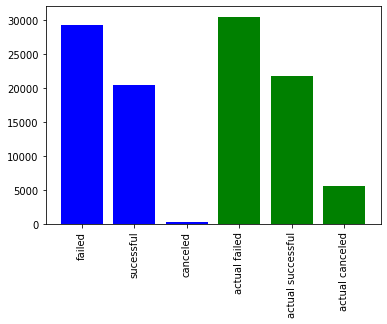

In [ ]:
names = ['failed', 'sucessful', 'canceled', 'actual failed', 'actual successful', 'actual canceled']
values = [cm_svm[0][0], cm_svm[1][1], cm_svm[2][2],counts[0], counts[1], counts[2]]
plt.xticks(rotation='vertical')
plt.bar(names, values, color=['blue','blue','blue','green','green','green'])